**Лабораторная работа 1**

ИУ5И-21М Хаммуд Хала

**Цель работы**

Изучение различных методов визуализация данных и создание истории на основе данных

**Задание**

Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь. Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований: История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию. На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков. Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов. Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика. История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

Сформировать отчет и разместить его в своем репозитории на github. Средства и способы визуализации данных можно посмотреть здесь.

In [2]:
from google.colab import files
uploaded = files.upload()


Saving amazon_sales_data 2025.csv to amazon_sales_data 2025.csv


In [3]:
# Импорт необходимых библиотек для анализа данных и визуализации
import pandas as pd          # Работа с таблицами и CSV-файлами
import numpy as np           # Математические операции и массивы
import matplotlib.pyplot as plt   # Построение графиков (статичная визуализация)
import seaborn as sns        # Статистические графики
import plotly.express as px  # Интерактивные графики



In [4]:
# Загрузка набора данных о продажах Amazon за 2025 год
df = pd.read_csv("amazon_sales_data 2025.csv")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [5]:
df.head()


,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [7]:
# Основные статистические характеристки числовых признаков:
# среднее значение, стандартное отклонение, минимумы, максимумы и квартильные значения
df.describe()


,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [9]:
# Просмотр всех названий столбцов в наборе данных
df.columns
# Определим уникальные значения для признака 'Category'
df['Category'].unique()


array(['Footwear', 'Electronics', 'Clothing', 'Books', 'Home Appliances'],
      dtype=object)

**Визуальное исследование датасета (версия для Amazon Sales)**

Будем рассматривать ключевые аспекты, связанные с анализом продаж:

распределение выручки,

сравнение категорий товаров,

влияние рейтингов и скидок на объем продаж,

и поведение клиентов в разных регионах.

Для каждой задачи будет описано:

какой тип графика рекомендуется,

почему он подходит для данного анализа,

а также какие альтернативные визуализации могут ввести в заблуждение или быть менее информативными.



**Плотность продаж по категориям товаров (kdeplot)**

<ipython-input-8-7d194969724c>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Категория товара")


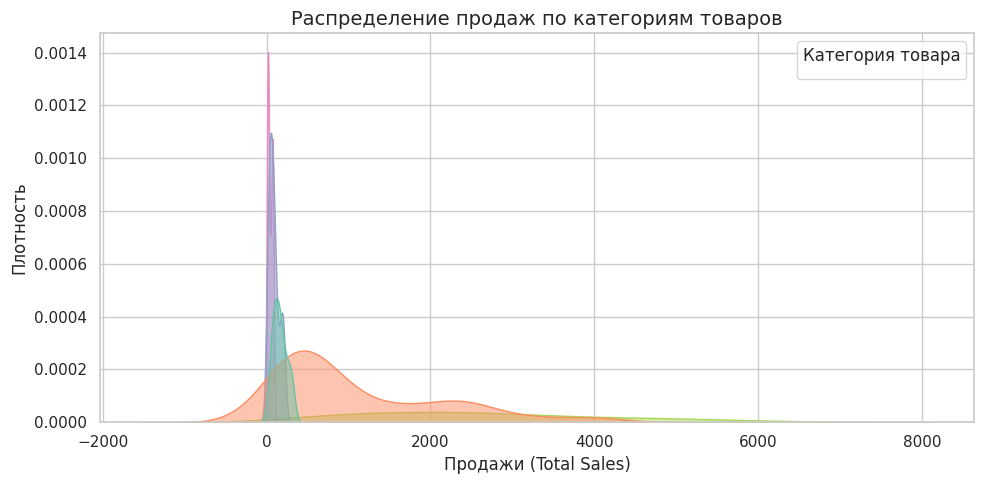

In [8]:
# Настройки графиков
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Палитра цветов для категорий
unique_categories = df['Category'].unique()
category_palette = dict(zip(unique_categories, sns.color_palette("Set2", n_colors=len(unique_categories))))

# Построение графика плотности продаж по категориям
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="Total Sales", hue="Category", fill=True, alpha=0.5, palette=category_palette)

plt.title("Распределение продаж по категориям товаров", fontsize=14)
plt.xlabel("Продажи (Total Sales)")
plt.ylabel("Плотность")
plt.legend(title="Категория товара")
plt.tight_layout()
plt.show()




**Плотность продаж по способу оплаты (kdeplot)**

<ipython-input-9-0ae1ab7c87a9>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Способ оплаты")


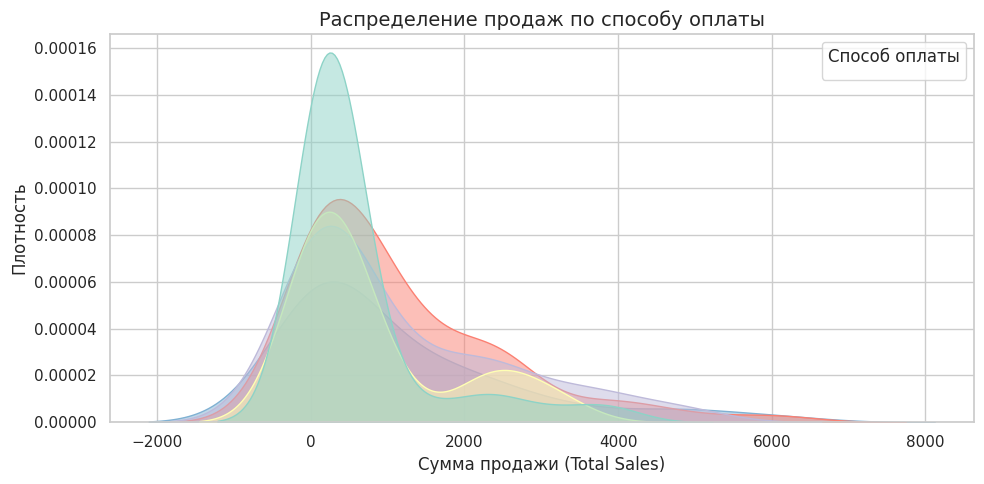

In [9]:
# Плотность продаж по способу оплаты (kdeplot)
plt.figure(figsize=(10, 5))

# Уникальные способы оплаты
payment_palette = dict(zip(df['Payment Method'].unique(), sns.color_palette("Set3", n_colors=df['Payment Method'].nunique())))

# Построение графика
sns.kdeplot(data=df, x="Total Sales", hue="Payment Method", fill=True, alpha=0.5, palette=payment_palette)

plt.title("Распределение продаж по способу оплаты", fontsize=14)
plt.xlabel("Сумма продажи (Total Sales)", fontsize=12)
plt.ylabel("Плотность", fontsize=12)
plt.legend(title="Способ оплаты")
plt.tight_layout()
plt.show()


**Гистограмма: распределение объема продаж**

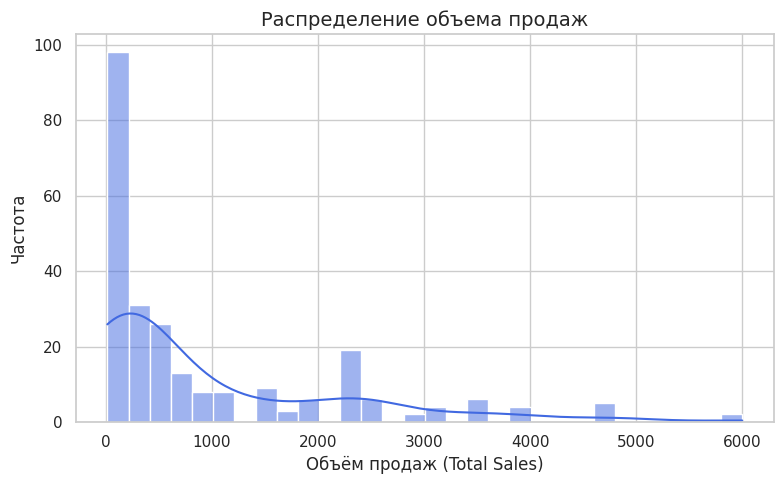

In [10]:
# Гистограмма: распределение объема продаж
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Total Sales'], bins=30, kde=True, color='royalblue')

plt.xlabel('Объём продаж (Total Sales)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Распределение объема продаж', fontsize=14)
plt.tight_layout()
plt.show()

**2. Зависимость объёма продаж от способа оплаты**

Рекомендуемый график:

Boxplot (ящик с усами) – покажет медиану, разброс и выбросы объёма продаж для разных способов оплаты.

Почему именно этот график:

В датасете переменная "Payment Method" является категориальной, а "Total Sales" – количественной.
Boxplot позволяет сравнить медиану, интерквартильный размах и выявить выбросы в каждой группе.
Это помогает понять, как отличается объём продаж в зависимости от способа оплаты.

Альтернативы и их недостатки:

Stacked Bar Chart (слоёная столбчатая диаграмма):
Сложно отобразить распределение продаж внутри категорий.
Она покажет только общую сумму, но не вариативность.

Violin Plot:
Также показывает плотность распределения, но при небольшом объёме данных или сильных выбросах
может выглядеть менее наглядно, чем boxplot.



<ipython-input-11-5a4b9c91f3e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Payment Method', y='Total Sales', data=df, palette='coolwarm')


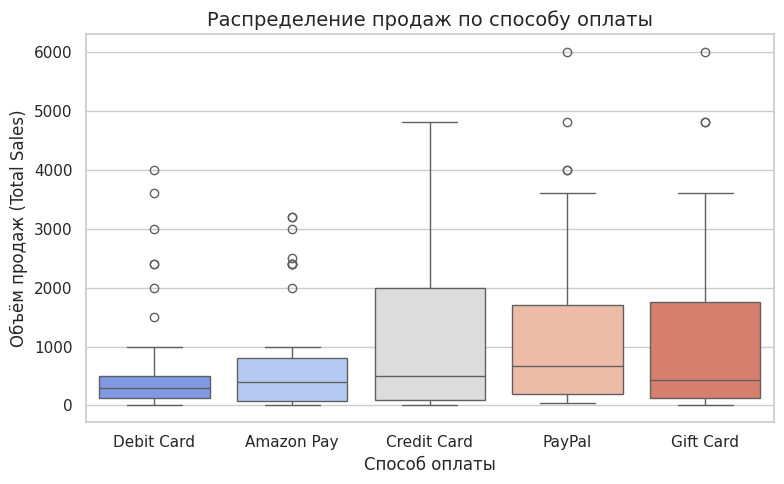

In [11]:
# Boxplot: распределение объёма продаж по способу оплаты
plt.figure(figsize=(8, 5))
sns.boxplot(x='Payment Method', y='Total Sales', data=df, palette='coolwarm')

plt.xlabel('Способ оплаты', fontsize=12)
plt.ylabel('Объём продаж (Total Sales)', fontsize=12)
plt.title('Распределение продаж по способу оплаты', fontsize=14)
plt.tight_layout()
plt.show()


**3. Изучение влияния способа оплаты на объём продаж**


Определим тип данных:
У нас есть две переменные:

"Payment Method" – категориальная (дискретная), потому что содержит типы оплаты: Credit Card, Cash, Online, и т.д.

"Total Sales" – числовая (непрерывная).

По дереву Data-to-Viz, если у нас есть:
категориальная переменная + числовая переменная,
мы выбираем один из следующих типов визуализаций:

Boxplot – если хотим увидеть медиану, квартильные значения и выбросы.

Violin Plot – если хотим дополнительно показать форму распределения.

Density Plot (KDE) – если хотим визуально сравнить "плотность" значений между группами.

Таким образом, для анализа того, влияет ли способ оплаты на сумму продаж,
мы можем использовать Boxplot или Violin Plot.



<ipython-input-12-ddf8f17db3e2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Payment Method", y="Total Sales", data=df, palette=palette, inner="quartile")


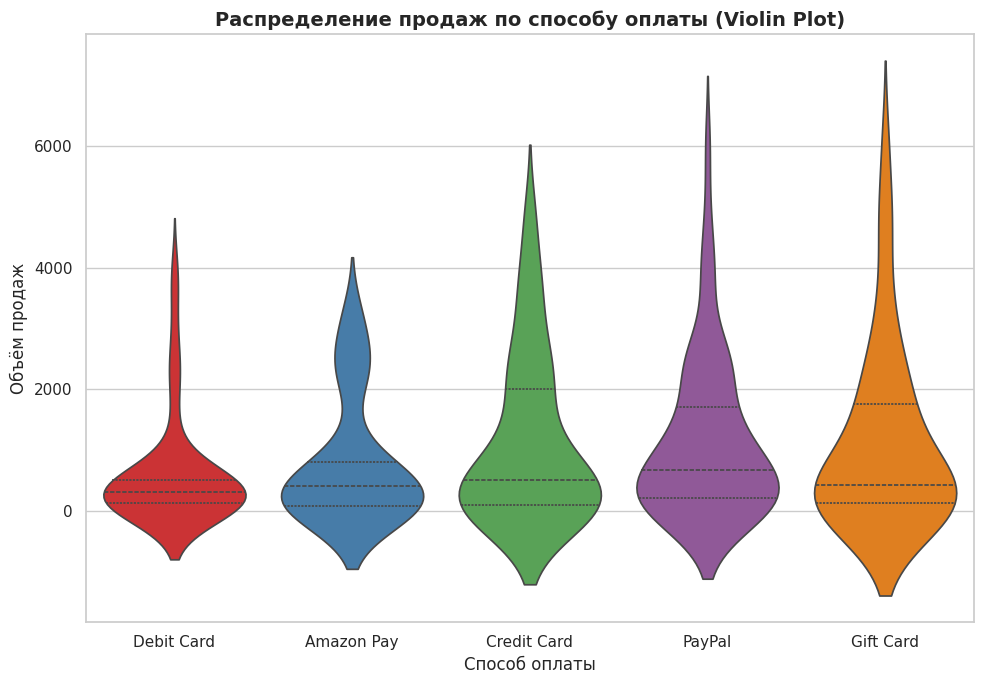

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль
sns.set_theme(style="whitegrid")

# Палитра цветов
palette = "Set1"

# Построение виолончельного графика (Violin Plot)
plt.figure(figsize=(10, 7))
sns.violinplot(x="Payment Method", y="Total Sales", data=df, palette=palette, inner="quartile")

plt.title("Распределение продаж по способу оплаты (Violin Plot)", fontsize=14, fontweight="bold")
plt.xlabel("Способ оплаты", fontsize=12)
plt.ylabel("Объём продаж", fontsize=12)

plt.tight_layout()
plt.show()


**4. Столбчатая диаграмма количества заказов по регионам (Customer Location)**


Что показывает:
Показывает, в каких регионах (городах или странах) было сделано наибольшее количество заказов.
Помогает определить, где сосредоточена основная клиентская база.

На что обратить внимание:

Если слишком много уникальных регионов, лучше отображать только топ-10.

Следует учитывать возможные региональные различия в покупательской способности.

Можно дополнительно рассмотреть связь с методами оплаты или категориями товаров.

Bar Chart (столбчатая диаграмма) — оптимальный выбор, так как хорошо визуализирует сравнение количества заказов между категориями.

Типичная ошибка:
Не сортировать регионы по количеству заказов, что делает график трудным для интерпретации.



<ipython-input-13-3e4fa08e53cf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


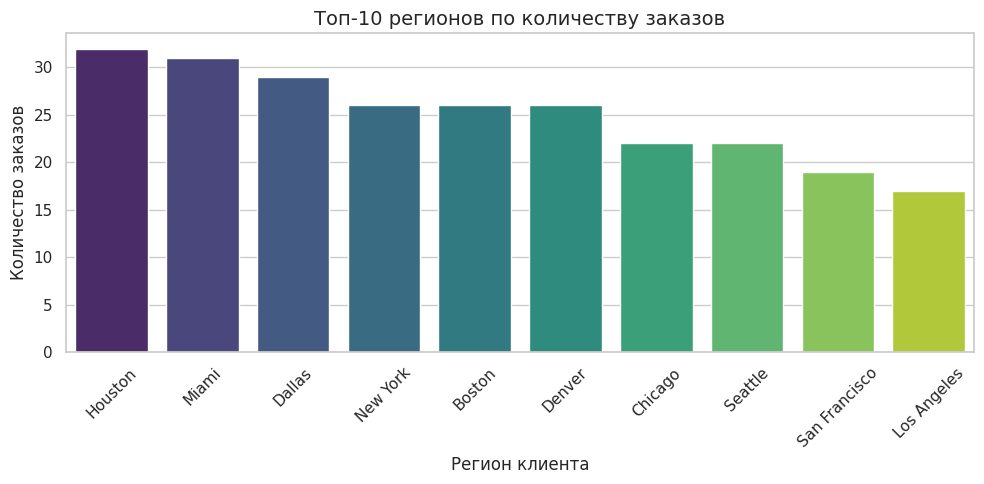

In [13]:
# Столбчатая диаграмма: топ-10 регионов по количеству заказов
plt.figure(figsize=(10, 5))

# Получим топ-10 регионов
top_locations = df['Customer Location'].value_counts().nlargest(10)

# Построим график
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')

# Подписи
plt.xlabel('Регион клиента', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.title('Топ-10 регионов по количеству заказов', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Эволюция объёма продаж по месяцам (Line Chart)
Когда использовать:
Если интересует динамика изменения объёма продаж во времени — например, по месяцам или неделям.

Почему:
Линейный график хорошо отображает тренд и позволяет наглядно сравнить, как меняется объём продаж с течением времени.
Это может помочь выявить сезонность, пики активности и провалы.

Недостатки:
Если данные зашумлены или имеют пропуски, можно потерять ясность.
Рекомендуется агрегировать данные — например, брать среднее значение или сумму продаж по месяцам.

Line Chart (линейный график) — лучший выбор для отображения трендов.
Типичная ошибка:
Не агрегировать данные по времени, не учитывать праздники, сезонные акции или возвраты.



<ipython-input-14-786b3d47832d>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


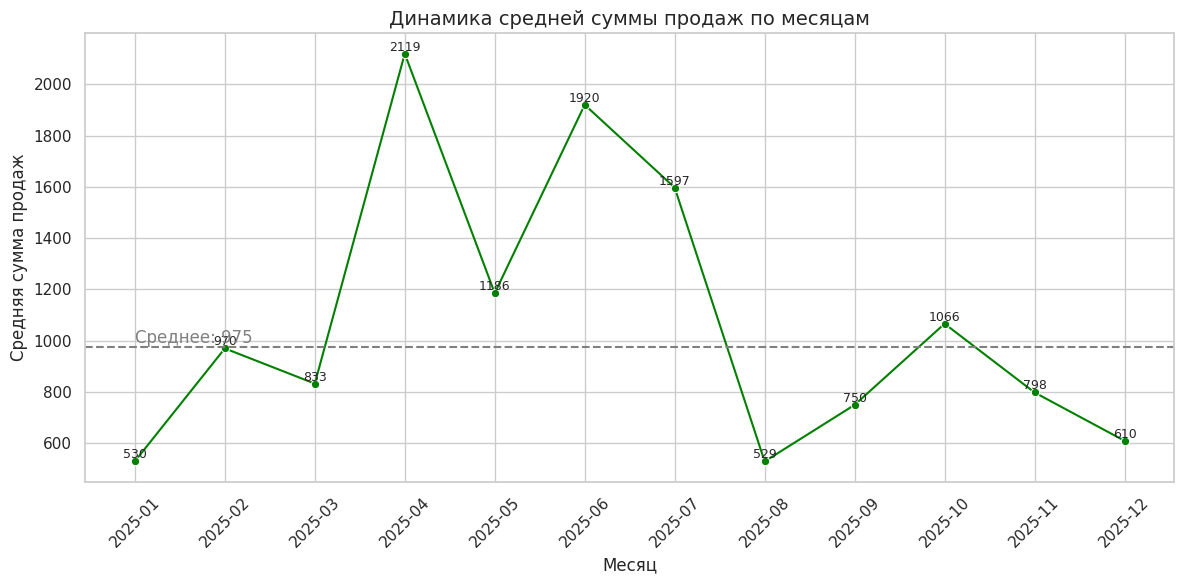

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv("amazon_sales_data 2025.csv")

# Преобразуем 'Date' в формат даты
df['Date'] = pd.to_datetime(df['Date'])

# Группировка по месяцам и вычисление средней суммы продаж
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Sales'].mean()

# Построение линейного графика
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o', color='green')

# Добавление аннотаций
for period, value in zip(monthly_sales.index, monthly_sales.values):
    plt.text(str(period), value, f'{value:.0f}', ha='center', va='bottom', fontsize=9)

# Горизонтальная линия среднего значения
overall_mean = df['Total Sales'].mean()
plt.axhline(overall_mean, color='gray', linestyle='--')
plt.text(0, overall_mean, f'Среднее: {overall_mean:.0f}', color='gray', va='bottom')

# Подписи
plt.title("Динамика средней суммы продаж по месяцам", fontsize=14)
plt.xlabel("Месяц", fontsize=12)
plt.ylabel("Средняя сумма продаж", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


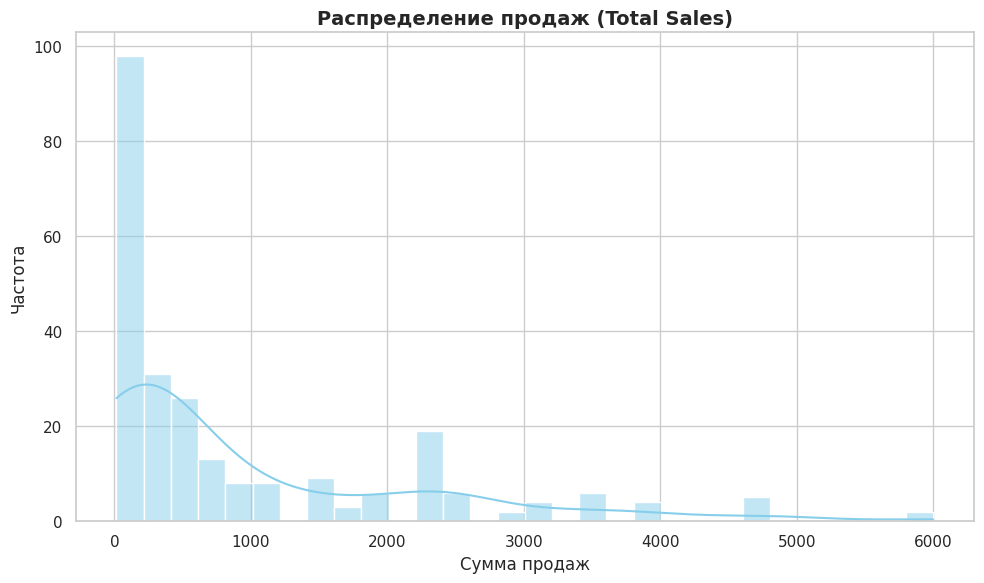

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv("amazon_sales_data 2025.csv")  # تأكدي أن الملف تم رفعه واسم الملف صحيح

# Устанавливаем стиль Seaborn
sns.set_theme(style="whitegrid")

###########################################################
# 1. Распределение продаж (Histogram + KDE)
###########################################################
plt.figure(figsize=(10, 6))
sns.histplot(df["Total Sales"], bins=30, kde=True, color="skyblue")
plt.title("Распределение продаж (Total Sales)", fontsize=14, fontweight="bold")
plt.xlabel("Сумма продаж", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-16-91f37e2f3aef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Total Sales", data=df, palette="Set2")


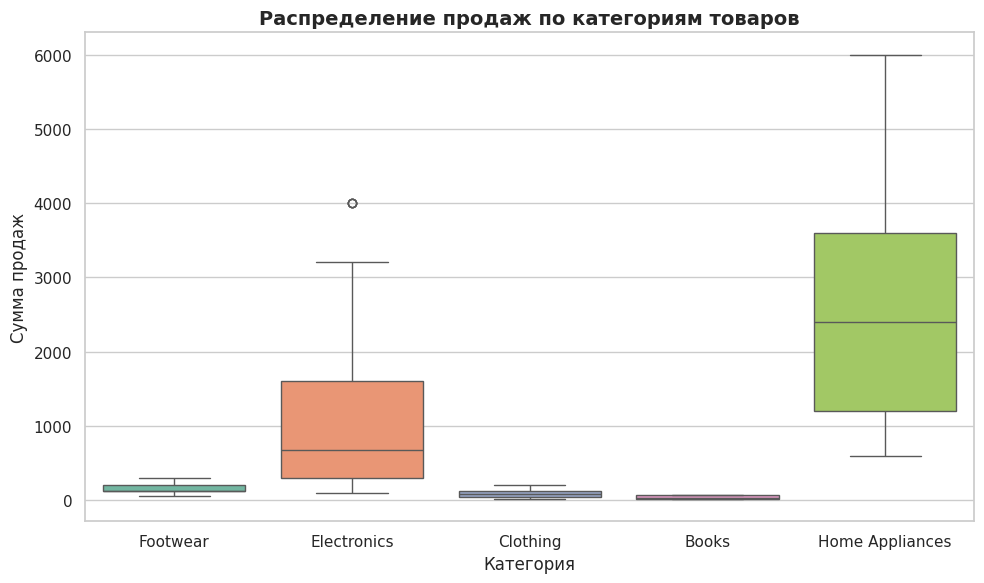

In [16]:
# 2. Boxplot: Анализ продаж по категориям товаров
###########################################################
plt.figure(figsize=(10, 6))
sns.boxplot(x="Category", y="Total Sales", data=df, palette="Set2")
plt.title("Распределение продаж по категориям товаров", fontsize=14, fontweight="bold")
plt.xlabel("Категория", fontsize=12)
plt.ylabel("Сумма продаж", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-17-80b66b244c47>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


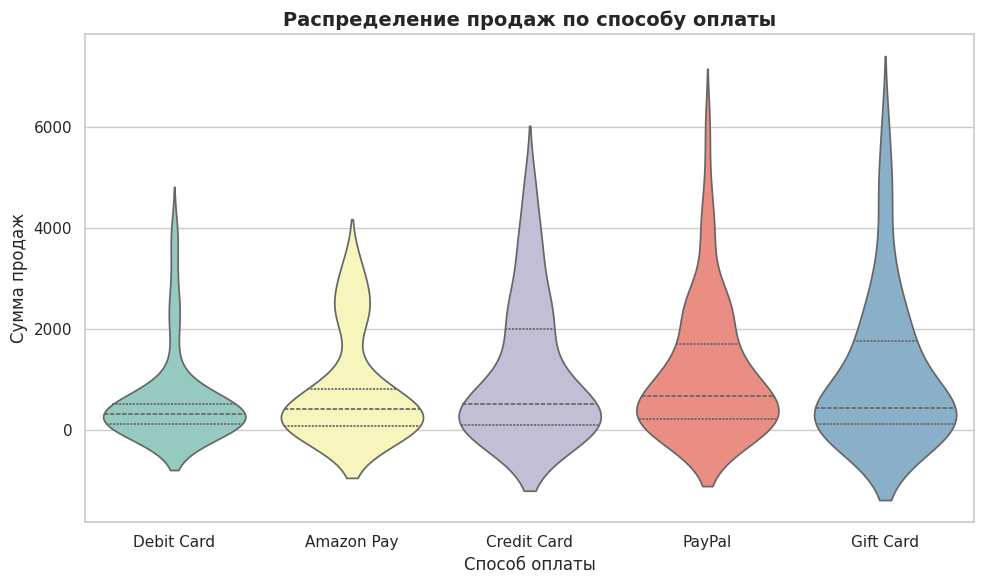

In [17]:
# 3. Violin Plot: Распределение продаж по способу оплаты (Payment Method)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Виолончельный график: распределение объема продаж по способу оплаты
sns.violinplot(
    x="Payment Method",
    y="Total Sales",
    data=df,
    palette="Set3",
    inner="quartile"
)

plt.title("Распределение продаж по способу оплаты", fontsize=14, fontweight="bold")
plt.xlabel("Способ оплаты", fontsize=12)
plt.ylabel("Сумма продаж", fontsize=12)
plt.tight_layout()
plt.show()


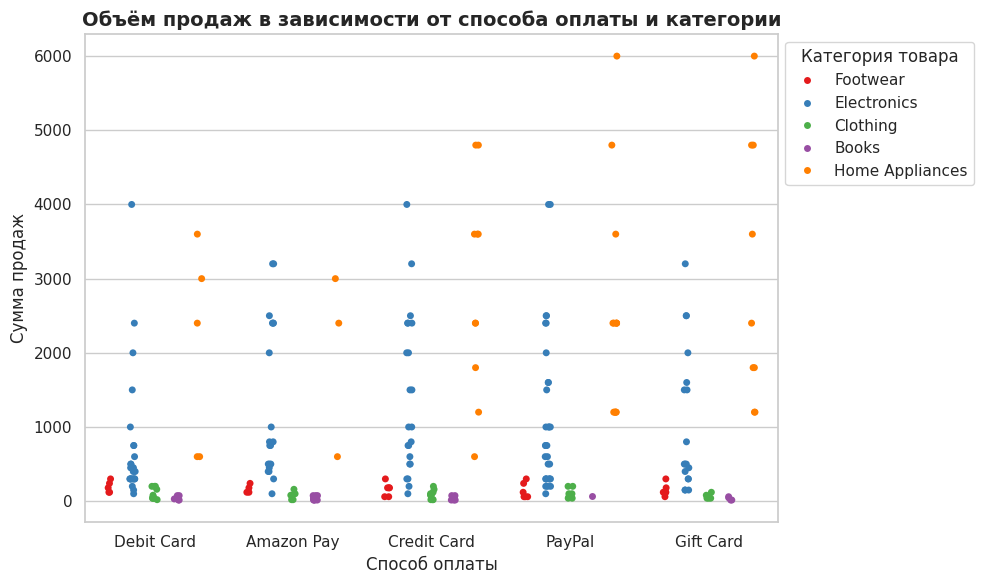

In [18]:
# 4. Strip Plot: Объём продаж по способу оплаты (цвет – категория товара)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.stripplot(
    x="Payment Method",
    y="Total Sales",
    data=df,
    hue="Category",
    palette="Set1",
    jitter=True,
    dodge=True
)

plt.title("Объём продаж в зависимости от способа оплаты и категории", fontsize=14, fontweight="bold")
plt.xlabel("Способ оплаты", fontsize=12)
plt.ylabel("Сумма продаж", fontsize=12)
plt.legend(title="Категория товара", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


<ipython-input-20-b8536b677105>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_by_product.values, y=avg_sales_by_product.index, palette="viridis")


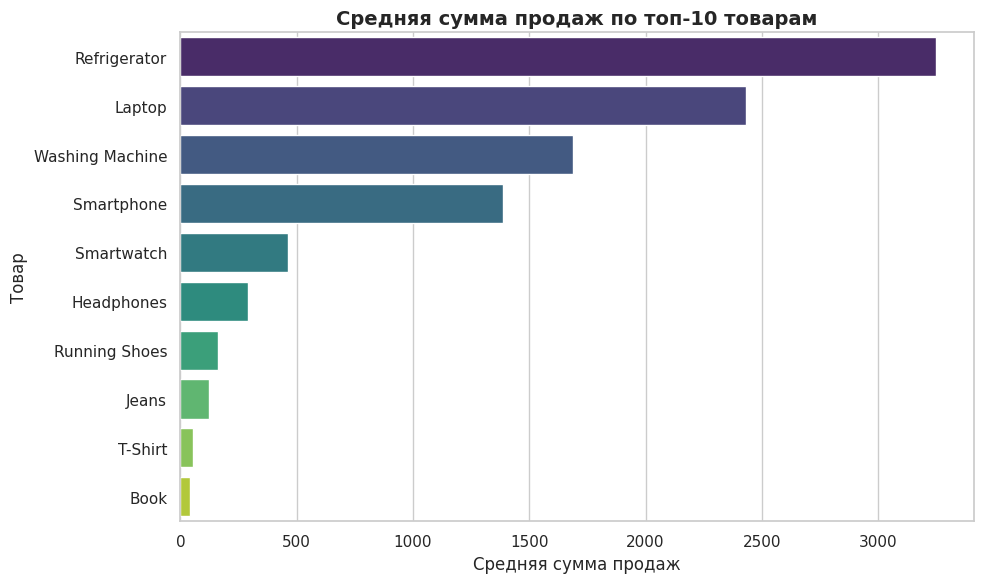

In [20]:
# 5. Bar Plot: Средняя сумма продаж по топ-10 товарам (Product)
import matplotlib.pyplot as plt
import seaborn as sns

# Топ-10 самых популярных товаров
top_products = df["Product"].value_counts().head(10).index
df_top = df[df["Product"].isin(top_products)]

# Расчёт средней суммы продаж по каждому товару
avg_sales_by_product = df_top.groupby("Product")["Total Sales"].mean().sort_values(ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_by_product.values, y=avg_sales_by_product.index, palette="viridis")

plt.title("Средняя сумма продаж по топ-10 товарам", fontsize=14, fontweight="bold")
plt.xlabel("Средняя сумма продаж", fontsize=12)
plt.ylabel("Товар", fontsize=12)
plt.tight_layout()
plt.show()



<ipython-input-21-b9dae4503b42>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Category", data=df, palette="pastel")


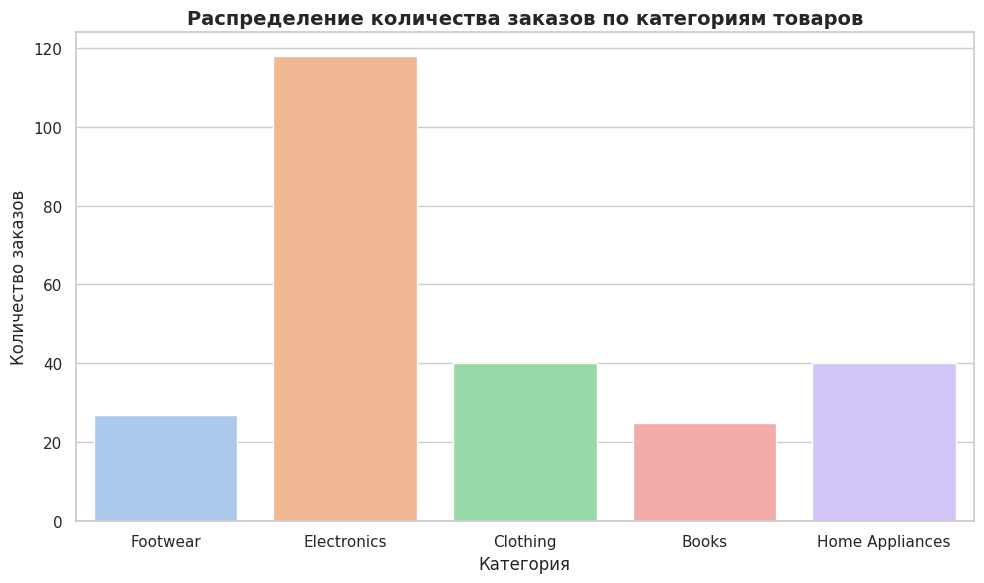

In [21]:
# 6. Count Plot: Распределение количества заказов по категориям товаров
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x="Category", data=df, palette="pastel")

plt.title("Распределение количества заказов по категориям товаров", fontsize=14, fontweight="bold")
plt.xlabel("Категория", fontsize=12)
plt.ylabel("Количество заказов", fontsize=12)
plt.tight_layout()
plt.show()


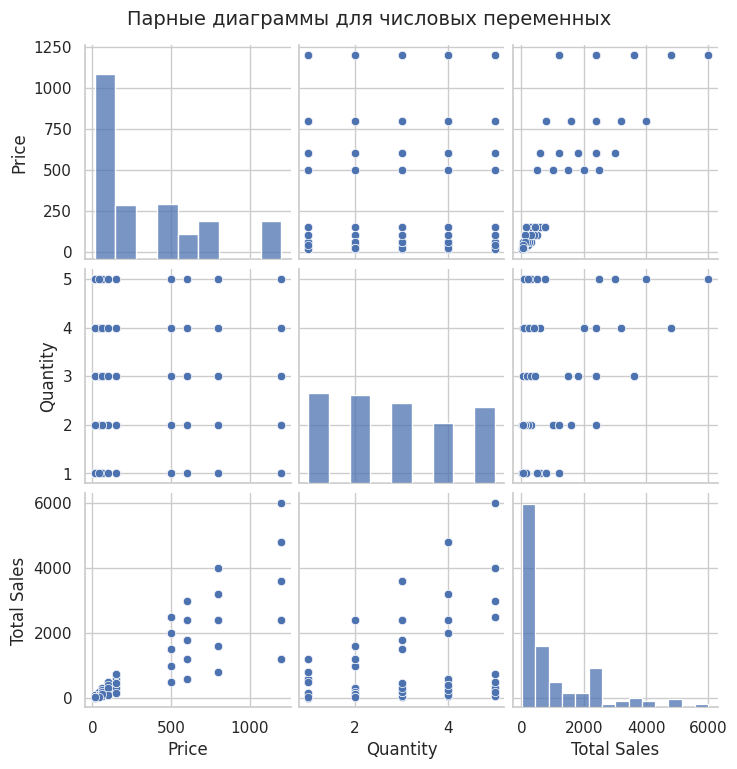

In [24]:
# 7. Pairplot: Парные диаграммы для числовых переменных (Price, Quantity, Total Sales)
import seaborn as sns
import matplotlib.pyplot as plt

# Выбираем числовые переменные
numeric_cols = ['Price', 'Quantity', 'Total Sales']

# Строим парные диаграммы
sns.pairplot(df[numeric_cols])
plt.suptitle("Парные диаграммы для числовых переменных", y=1.02, fontsize=14)
plt.show()


<ipython-input-23-d310242e9a9a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


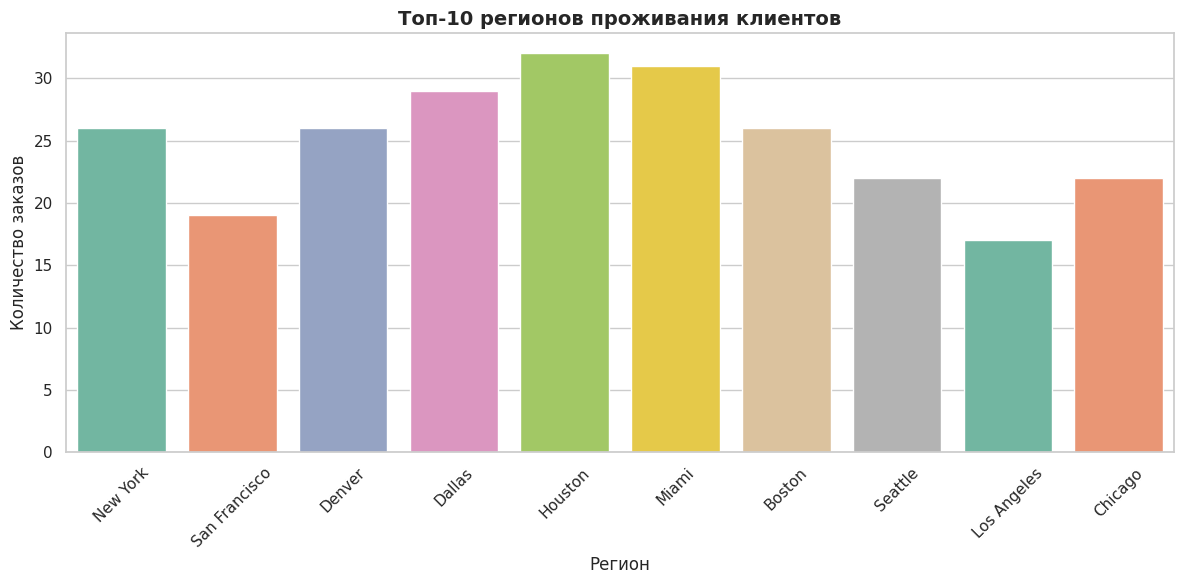

In [23]:
# 8. Count Plot: Топ-10 регионов проживания клиентов (Customer Location)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Получаем топ-10 регионов
top_locations = df["Customer Location"].value_counts().head(10).index

# Строим countplot
sns.countplot(
    x="Customer Location",
    data=df[df["Customer Location"].isin(top_locations)],
    palette="Set2"
)

plt.title("Топ-10 регионов проживания клиентов", fontsize=14, fontweight="bold")
plt.xlabel("Регион", fontsize=12)
plt.ylabel("Количество заказов", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
